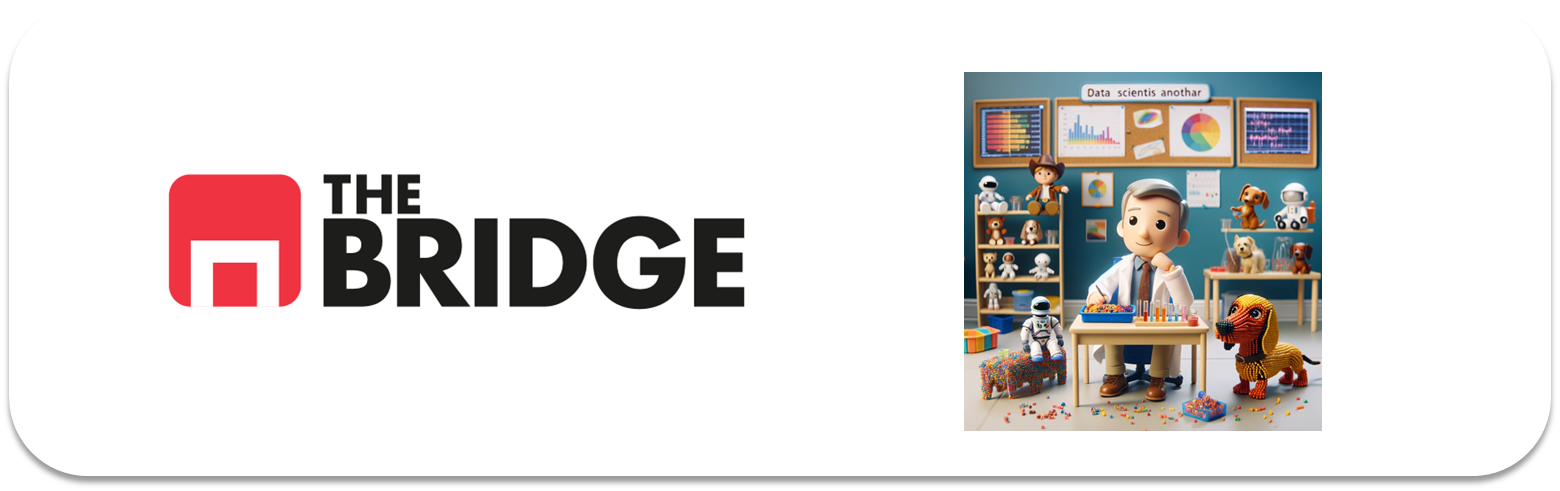

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bootcampviztools




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [3]:
df_titanic_csv = pd.read_csv("./data/titanic.csv")

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df_titanic = sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [5]:


df_titanic.info()
df_titanic.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
675,0,3,male,18.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
138,0,3,male,16.0,0,0,9.2167,S,Third,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
482,0,3,male,50.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
754,1,2,female,48.0,1,2,65.0000,S,Second,woman,False,NaN,Southampton,yes,False
864,0,2,male,24.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
313,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
504,1,1,female,16.0,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [6]:
df_titanic_2 = df_titanic.copy()

In [7]:
for indice in df_titanic:
    nulos = df_titanic[indice].isna().sum()
    totales = len(df_titanic[indice])
    porcentaje = round((nulos/totales)*100,2)
    print(f"El total de nulos para {indice} es {df_titanic[indice].isna().sum()} sobre {len(df_titanic[indice])} un {porcentaje}%")

#df_titanic.drop(columns=["deck","parch"],inplace=True)
df_titanic

El total de nulos para survived es 0 sobre 891 un 0.0%
El total de nulos para pclass es 0 sobre 891 un 0.0%
El total de nulos para sex es 0 sobre 891 un 0.0%
El total de nulos para age es 177 sobre 891 un 19.87%
El total de nulos para sibsp es 0 sobre 891 un 0.0%
El total de nulos para parch es 0 sobre 891 un 0.0%
El total de nulos para fare es 0 sobre 891 un 0.0%
El total de nulos para embarked es 2 sobre 891 un 0.22%
El total de nulos para class es 0 sobre 891 un 0.0%
El total de nulos para who es 0 sobre 891 un 0.0%
El total de nulos para adult_male es 0 sobre 891 un 0.0%
El total de nulos para deck es 688 sobre 891 un 77.22%
El total de nulos para embark_town es 2 sobre 891 un 0.22%
El total de nulos para alive es 0 sobre 891 un 0.0%
El total de nulos para alone es 0 sobre 891 un 0.0%


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived | Indica si sobrevivió |
| pclass       | Indicador numérico de la clase en la que iba el pasajero |
| sex       | masculino o femenino |
| age       | edad en formato numérico |
| sibsp       | número de familiares que viajan con la persona indicada en el manifiesto |
| fare       | cuanto se pagó por el billete |
| embarked       | por donde embarcó |
| class       | nombre de la clase en la que iba el pasajero |
| who       | hombre o mujer |
| adult_male       | indicador de si es hombre adulto |
| embark_town       | ciudad de embarque |
| alive       | Indicador sí o no de si vivió |
| alone       | indicador de si iba solo. Booleano |


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [8]:
df_titanic_3 = df_titanic.copy()

In [9]:
def actualiza(row):
    
    dictionary={
        "C":"Cherbourg",
        "S":"Southampton",
        "Q":"Queenstown"
    }
    if type(row) is str:
        return dictionary[row]
    else:
        return "Unknown"

df_titanic.embarked.apply(actualiza)

#df_titanic[df_titanic["embarked"]=="C"].embark_town = "Southampton")

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embarked, Length: 891, dtype: object

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [10]:
# Caso 1. Selección

df_tipificacion = pd.DataFrame([df_titanic[["survived","who","age","fare","class","embarked","alone"]].nunique(), df_titanic[["survived","who","age","fare","class","embarked","alone"]].nunique()/len(df_titanic[["survived","who","age","fare","class","embarked","alone"]]) * 100, df_titanic.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
df_tipificacion
df_tipificacion["Clasificada_como"] = "Categorica" # Partiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion


,Card,%_Card,Tipo,Clasificada_como
survived,2.0,0.224467,int64,Binaria
who,3.0,0.3367,object,Categorica
age,88.0,9.876543,float64,Numerica Discreta
fare,248.0,27.833895,float64,Numerica Discreta
class,3.0,0.3367,category,Categorica
embarked,3.0,0.3367,object,Categorica
alone,2.0,0.224467,bool,Binaria
pclass,NaN,NaN,int64,Categorica
sex,NaN,NaN,object,Categorica
sibsp,NaN,NaN,int64,Categorica


### #2.1 Categóricas

In [11]:
categoricas=["who","class","embarked"]

In [12]:

def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



In [13]:
#media
df_categoricas= df_titanic[categoricas]
df_categoricas.describe().mean
#df_categoricas.describe().loc["50%"]


<bound method DataFrame.mean of         who  class embarked
count   891    891      889
unique    3      3        3
top     man  Third        S
freq    537    491      644>

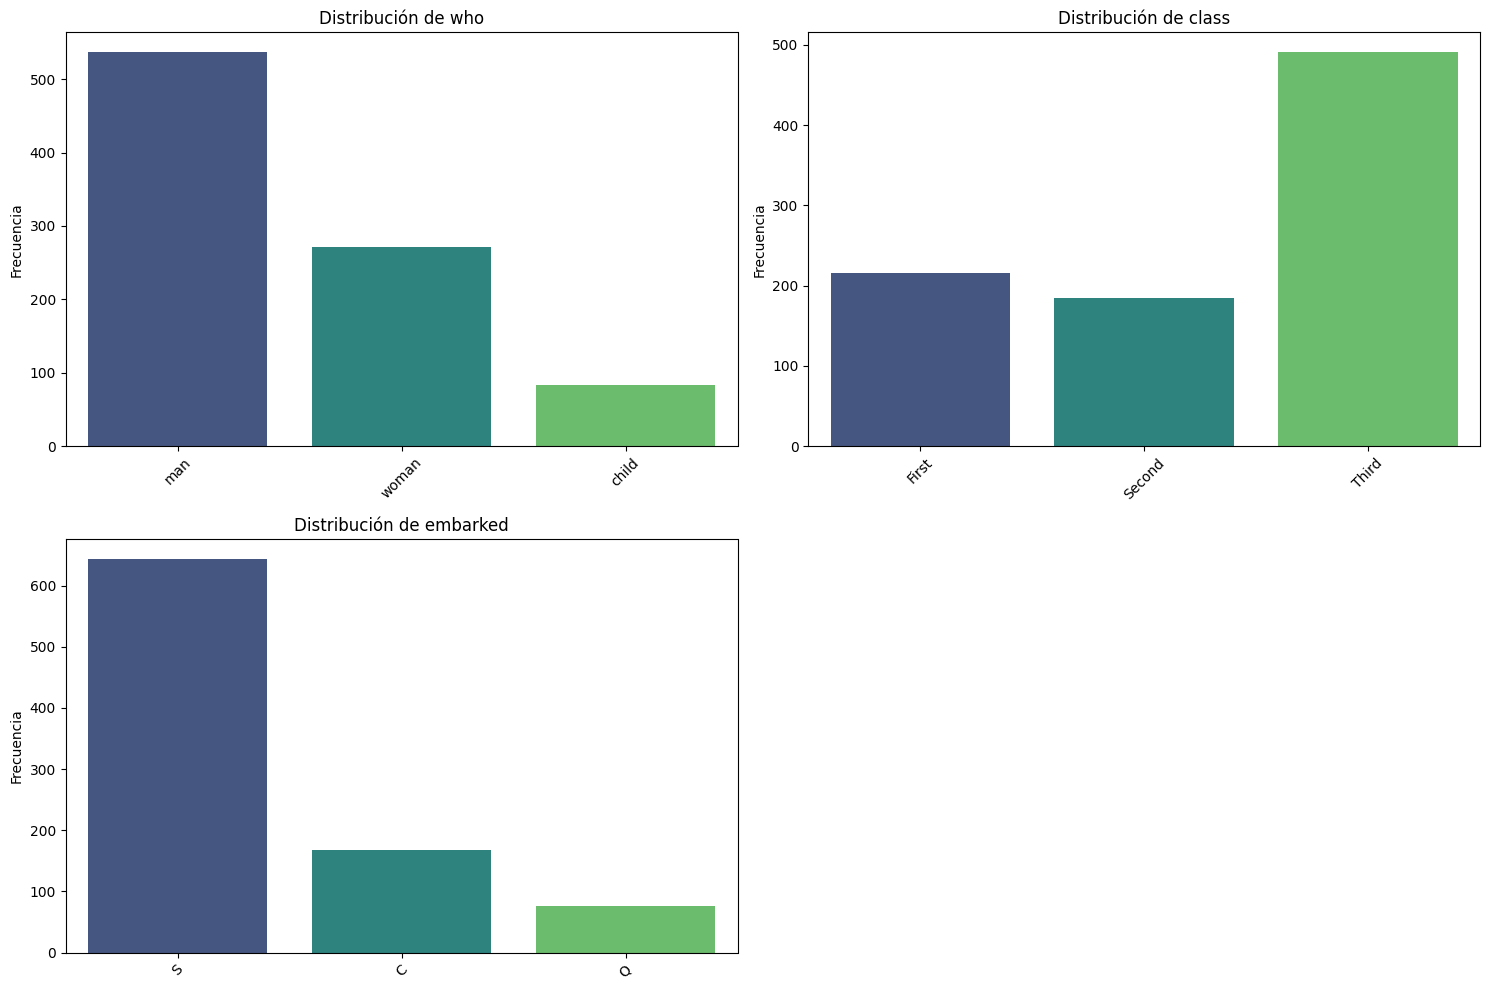

In [14]:
pinta_distribucion_categoricas(df_titanic,categoricas)

In [15]:
for catego in categoricas:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

Para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



Para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



Para embarked
embarked
S    644
C    168
Q     77
Name: count, dtype: int64





In [16]:
for catego in categoricas:
    print(f"Para {catego}")
    print(df_titanic[catego].value_counts()/len(df_titanic)*100)
    print("\n"*2)

Para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64



Para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



Para embarked
embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64





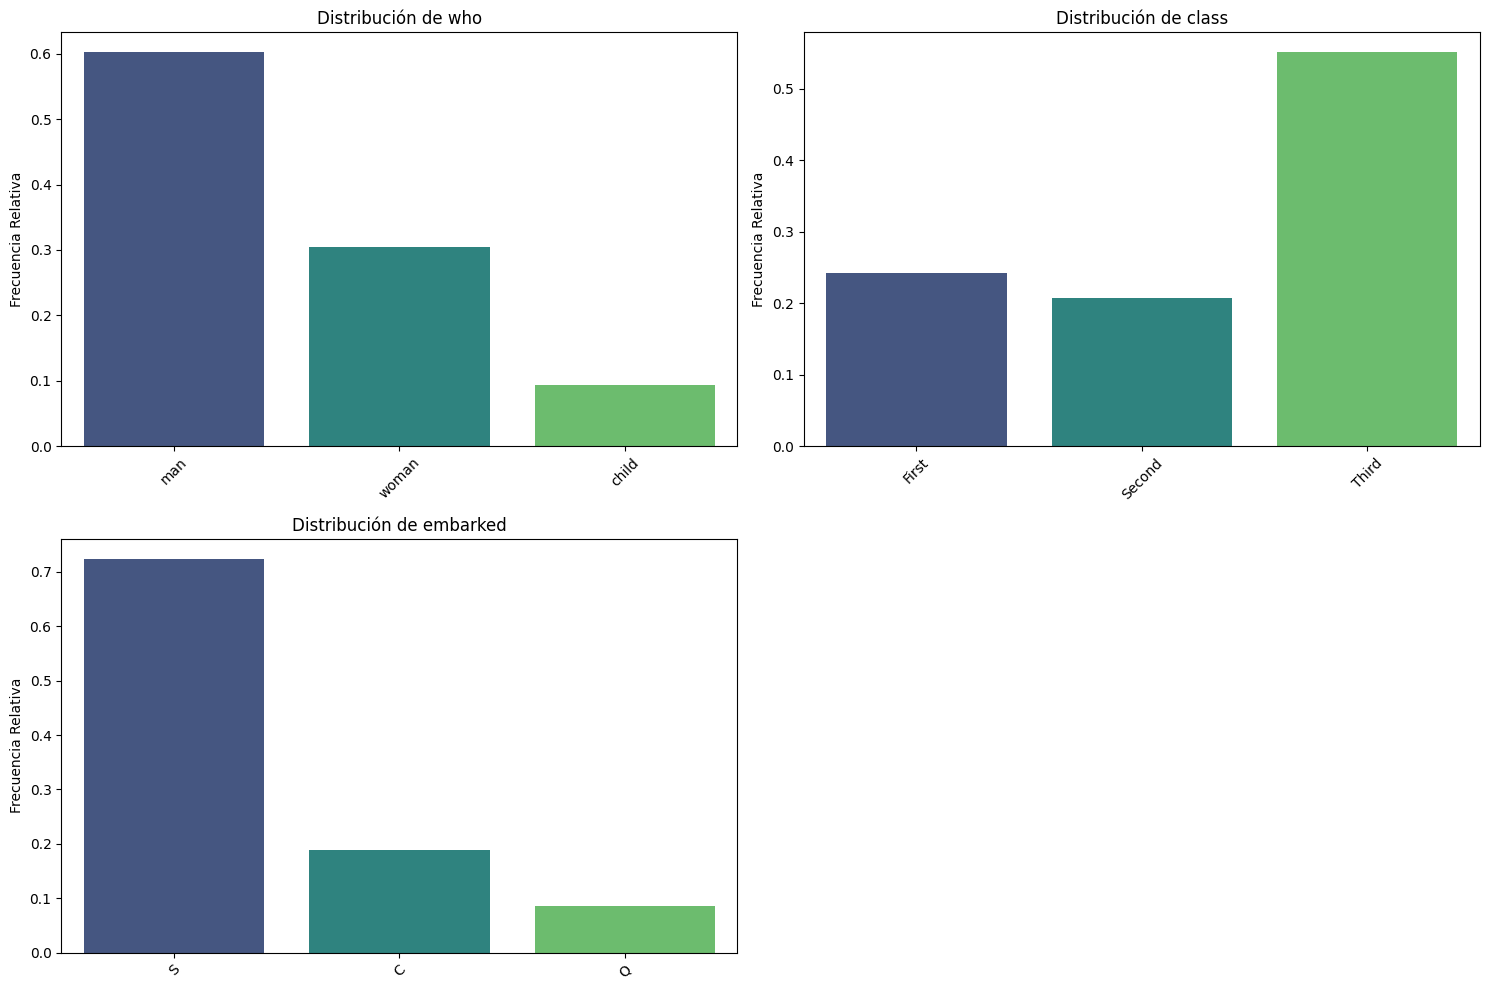

In [17]:
pinta_distribucion_categoricas(df_titanic,categoricas,relativa = True)

In [18]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

### #2.2 Numéricas

In [20]:
numericas=["age","fare"]

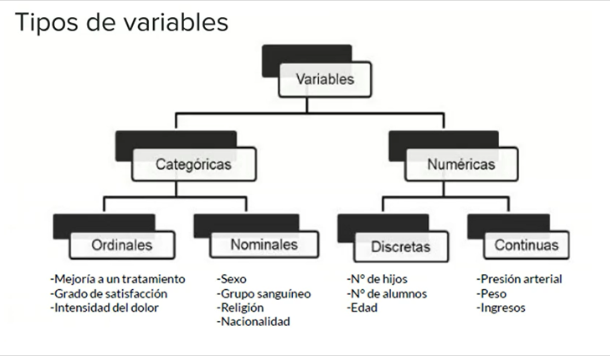

In [21]:
#media
df_numericas= df_titanic[numericas]
print(df_numericas.describe().mean)
print(df_numericas.describe().loc["50%"])

<bound method DataFrame.mean of               age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200>
age     28.0000
fare    14.4542
Name: 50%, dtype: float64


In [22]:
#pinta_distribucion_categoricas(df_titanic,numericas)
print(df_numericas.quantile(0.5),
    df_numericas.quantile(0.9), 
    df_numericas.quantile(0.95),
    df_numericas.max())

age     28.0000
fare    14.4542
Name: 0.5, dtype: float64 age     50.0000
fare    77.9583
Name: 0.9, dtype: float64 age      56.00000
fare    112.07915
Name: 0.95, dtype: float64 age      80.0000
fare    512.3292
dtype: float64


In [23]:
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

In [24]:
variabilidad(df_numericas)

,std,mean,CV
age,14.526497,29.699118,0.489122
fare,49.693429,32.204208,1.543073


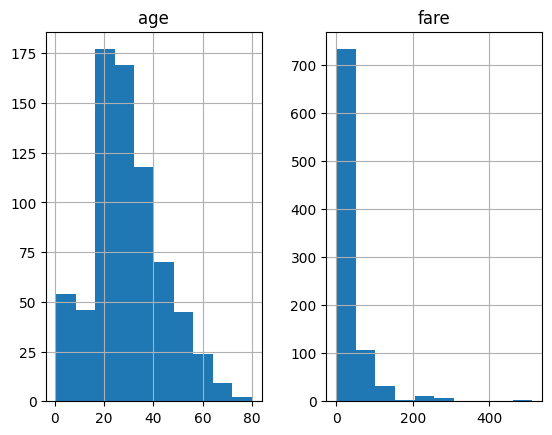

In [25]:
df_numericas.hist();

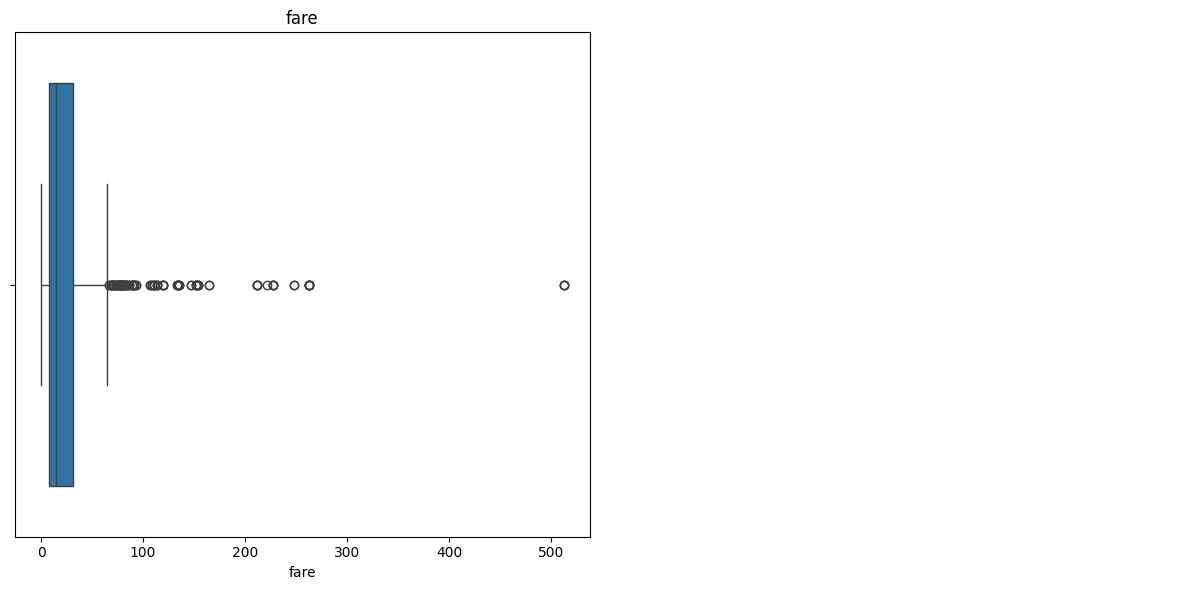

In [26]:
plot_multiple_boxplots(df_numericas, ["fare"])

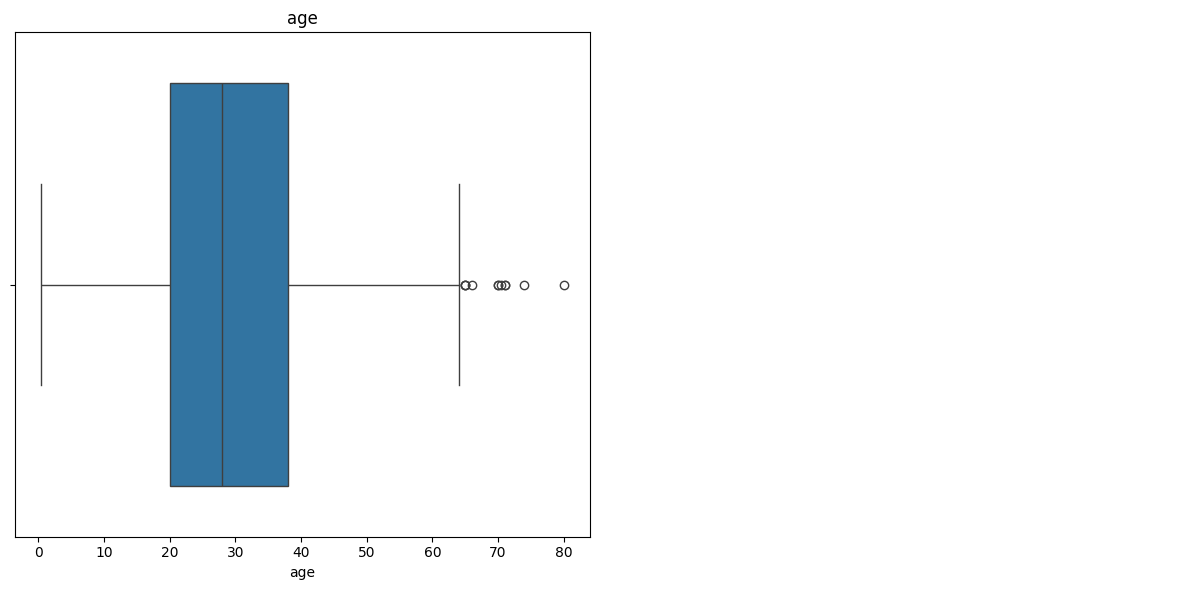

In [27]:
plot_multiple_boxplots(df_numericas, ["age"])

In [30]:
columnas_numericas = df_numericas.describe().columns.to_list()
plot_histo_den(df_numericas,columnas_numericas)

NameError: name 'plot_histo_den' is not defined

In [ ]:
plot_combined_graphs(df_numericas, columnas_numericas, whisker_width=1.5, bins = None):